## Download and import packages

In [8]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib

#import required packages

from numpy import mean, std
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import gdown

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Download Data and Load Data

In [9]:
# Download from Google Drive
url = 'https://drive.google.com/uc?id=' + '1BmICPGpdRg1dPmXi0G3Fe5IWs1MobCu8' #(URI ID)
output = '/home/kiran/ta/data/iris.data' # Destination directory
gdown.download(url, output, quiet=False) 

Downloading...
From: https://drive.google.com/uc?id=1BmICPGpdRg1dPmXi0G3Fe5IWs1MobCu8
To: /home/kiran/ta/data/iris.data
100%|██████████| 4.55k/4.55k [00:00<00:00, 1.91MB/s]


'/home/kiran/ta/data/iris.data'

In [11]:
#Load the data using pandas read_csv method
df=read_csv(output, sep=",", header=None)
#Display the first few rows in the dataframe
df.head()

0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa

In [12]:
#Loading the dataset
iris = datasets.load_iris()
#Creating a dataframe
df = pd.DataFrame(iris.data)
df['class'] = iris.target
y = df['class'].values
x = df.drop(['class'],axis=1).values
df[:5]

0    1    2    3  class
0  5.1  3.5  1.4  0.2      0
1  4.9  3.0  1.4  0.2      0
2  4.7  3.2  1.3  0.2      0
3  4.6  3.1  1.5  0.2      0
4  5.0  3.6  1.4  0.2      0

In [ ]:
# Task1 Display the first few rows of the data

## Visualize Data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0        150 non-null float64
1        150 non-null float64
2        150 non-null float64
3        150 non-null float64
class    150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


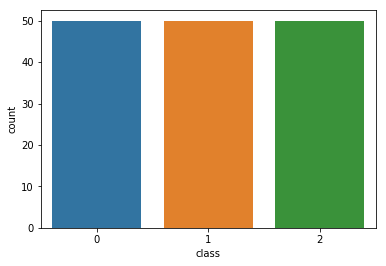

In [15]:
#Task2: Visualize the histogram of data classes
import seaborn as sns
# countplot show the distribution of values of the particular attribute
sns.countplot(x="class", data=df)
#show the plot
plt.show()

## Prepare data

To assess our model’s performance later, we will need to divide the data set into two parts: a training set and a
test set. The first is used to train the system, while the second is used to evaluate the learned or trained system.

Sklearn provides us with an easy way to randomly break up our data. We have decided to split the data with 20% as test and 80% as training.

In [27]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

## Train the Model

Hyper Parameters for Logistic Regression
1. penalty: Used to specify the norm used in the penalization. 
2. C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
3. max_iter: Maximum number of iterations taken for the solvers to converge.

In [18]:
# Delcare a Logistic Regression classifier
clf = LogisticRegression(penalty='l2',C=1.0, max_iter=10000)
# Train the classifier until max_iterations
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Hyper Parameters for Decision Trees
1. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
2. splitter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
3. max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
4. min_samples_split: The minimum number of samples required to split an internal node

In [37]:
# Declare a Decision Tree classifier
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
# Create Decision Tree on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Hyper Parameters for SVM
1. kernel: (‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed') Specifies the kernel type to be used in the algorithm.
2. degree: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
3. gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
4. max_iter: Hard limit on iterations within solver, or -1 for no limit.

In [28]:
# Declare the SVM classifier
clf = SVC(kernel='poly', degree=3, max_iter=300000)
# Train until max iterations
clf.fit(X_train, y_train)

SVC(kernel='poly', max_iter=300000)

In [50]:
# Task 3 Implement KNN using sklearn
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Task 4 Implement two other classifiers of your choice

## Evaluate the Model

Now we predict using our trained model on the test set we created and evaluate our model on unforeseen data.
The performance will be reflected in various standard metrics.

In [30]:
#Predicting for test data
y_pred = clf.predict(X_test)

In [48]:
#Calculating results for various evaluation metric
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

In [49]:
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1-score: 1.0


## Visualization of Results

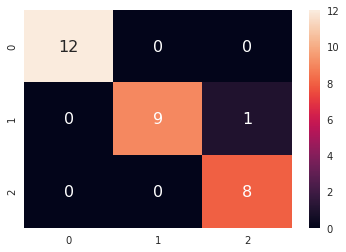

In [11]:
# Task 5: Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
sns.set(font_scale=1) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

## Bonus

## Comparing results with k-fold validation

In [51]:
# Task 6 k-fold-cross validation
# k-fold validation:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
# Declare the number of splits to be used in k-fold validation
kf = KFold(shuffle=True, n_splits=5)
# Declare the metric to be used for evaluation in k-fold validation
metric = make_scorer(accuracy_score)
# Pass the model, data, labels, metric in cross validation method
scores = cross_val_score(clf, x, y, scoring=metric, cv=kf, n_jobs=-1)

In [52]:
scores

array([0.96666667, 0.96666667, 0.96666667, 0.96666667, 1.        ])

In [56]:
# Task 7 Implement a classifier of your choice